In [2]:
%tensorflow_version 2.x


In [1]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0


--2020-12-01 13:27:30--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-12-01 13:27:30--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7d39976ca88dbb1ff5628fdfb.dl.dropboxusercontent.com/cd/0/inline/BEMww0-Tchivu1KXAi15mIt0YHsS7-UmMyEIAWp7T-3789DCc_3AA5Q1kzfxdYilfKjy7WTTfraGZu7f9i1ovKxzqme05r1wBhuAwIQF7FZapQ/file# [following]
--2020-12-01 13:27:31--  https://ucd7d39976ca88dbb1ff5628fdfb.dl.dropboxusercontent.com/cd/0/inline/BEMww0-Tchivu1KXAi15mIt0YHsS7-UmMyEIAWp7

In [3]:
!unzip /content/state-farm-distracted-driver-detection.zip?dl=0

Archive:  /content/state-farm-distracted-driver-detection.zip?dl=0
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip /content/imgs.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [5]:
import numpy as np 
import pandas as pd 
import os
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50, VGG19, InceptionV3, MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, Activation, MaxPooling2D, BatchNormalization
from keras import optimizers, regularizers
from keras.optimizers import SGD
from glob import glob
import cv2
import glob
from keras import backend as K
import numpy as np 
import pandas as pd 
import os
from keras import layers
from keras import models, Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50, VGG19, InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import load_img
from keras import optimizers, regularizers
from keras.optimizers import SGD
from glob import glob
import cv2
from keras.callbacks import EarlyStopping, Callback
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
import h5py
from PIL import Image
from sklearn.model_selection import train_test_split


In [6]:
RESOLUTION = 150
BATCH_SIZE=64

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
        "../content/train/",
        target_size=(160, 120),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training", color_mode='grayscale')

val_generator = val_datagen.flow_from_directory(
        "../content/train/",
        target_size=(160, 120),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation",  color_mode='grayscale')


Found 15702 images belonging to 10 classes.
Found 6722 images belonging to 10 classes.


In [7]:
def read_image(path):
  image = cv2.imread(path, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
col = {'c0' : 'safe driving',
       'c1' : 'texting - right',
       'c2' : 'talking on the phone - right',
       'c3' : 'texting - left',
       'c4' : 'talking on the phone - left',
       'c5' : 'operating the radio',
       'c6' : 'drinking',
       'c7' : 'reaching behind',
       'c8' : 'hair and makeup',
       'c9' : 'talking to passenger'}

In [8]:

print(os.listdir("../content"))
data_dir = '../content/'


['.config', 'test', 'driver_imgs_list.csv', 'train', 'state-farm-distracted-driver-detection.zip?dl=0', 'imgs.zip', 'sample_submission.csv', 'sample_data']


				# c0 : safe driving


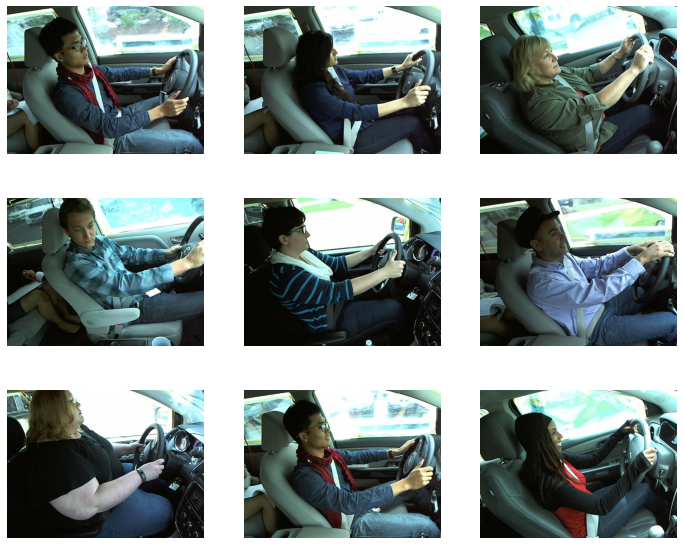

				# c1 : texting - right


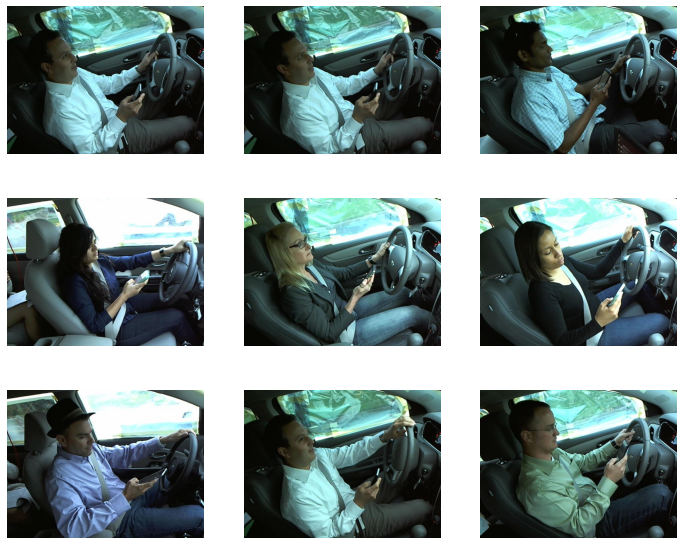

				# c2 : talking on the phone - right


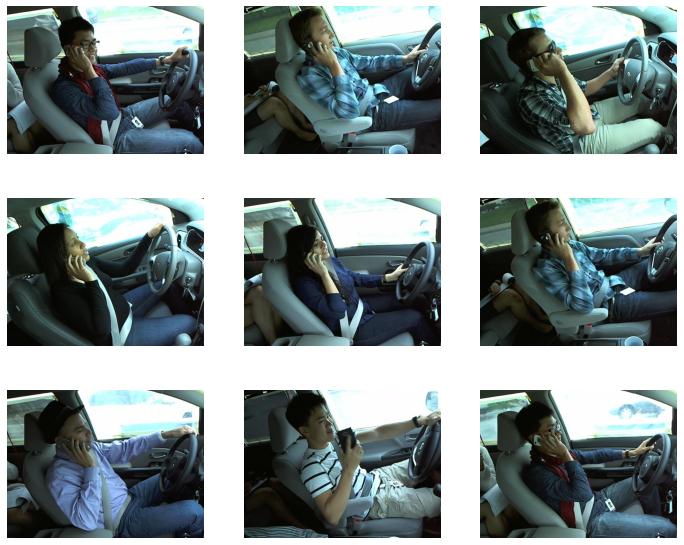

				# c3 : texting - left


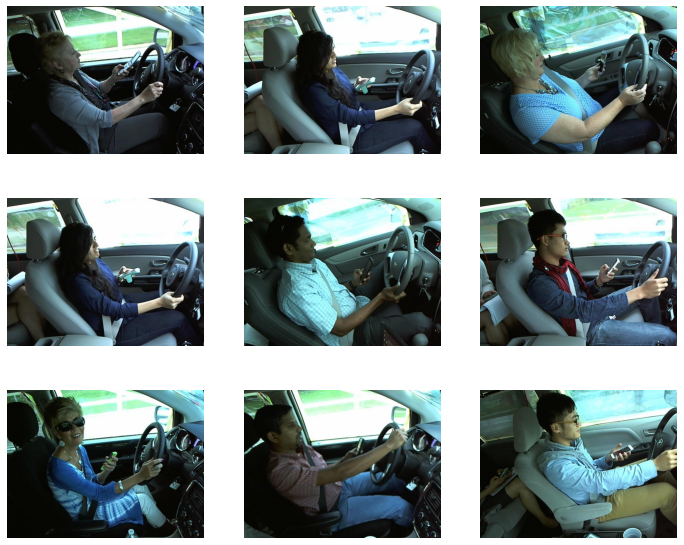

				# c4 : talking on the phone - left


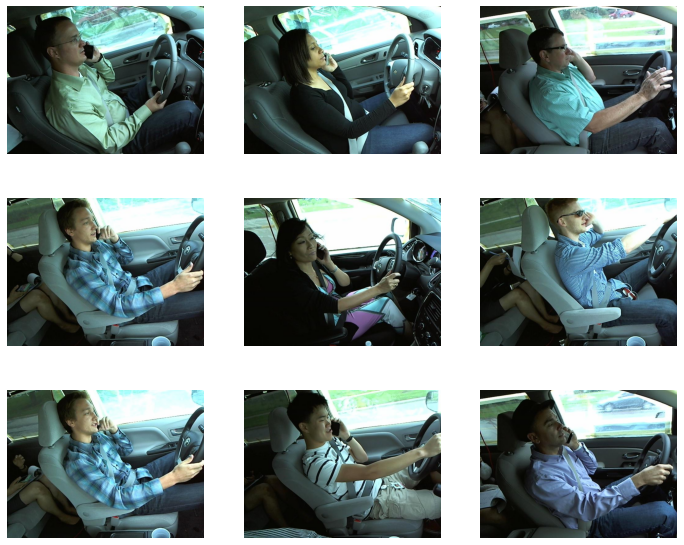

				# c5 : operating the radio


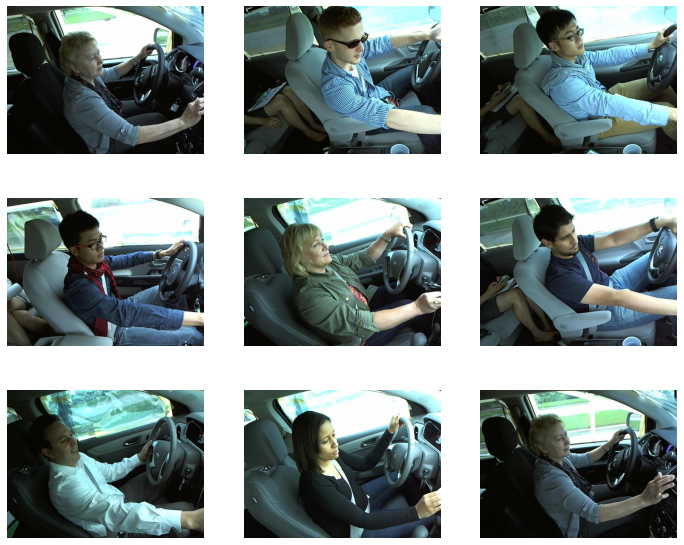

				# c6 : drinking


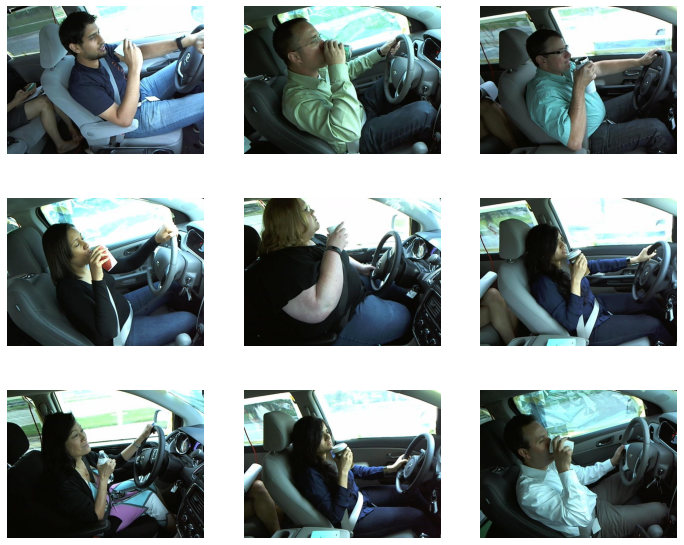

				# c7 : reaching behind


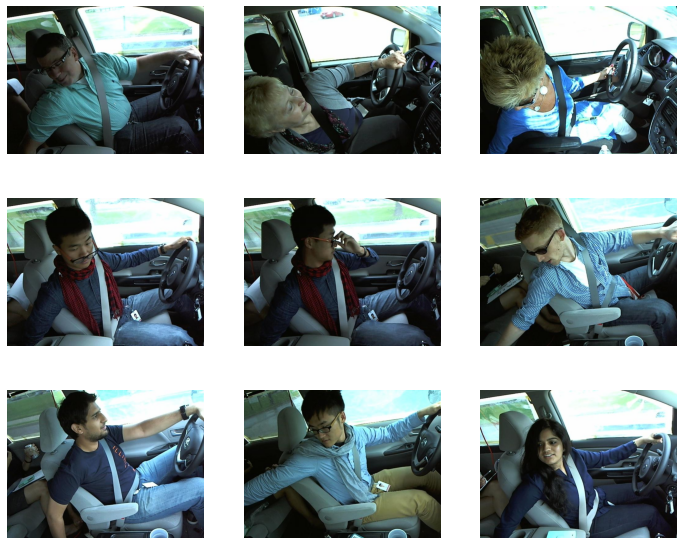

				# c8 : hair and makeup


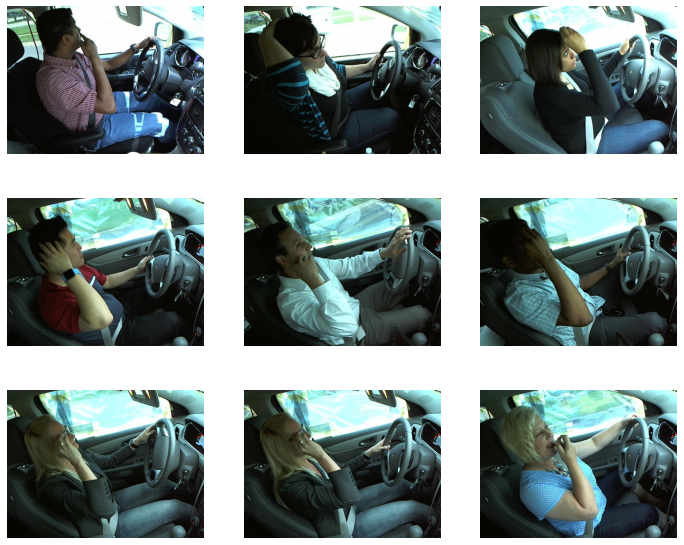

				# c9 : talking to passenger


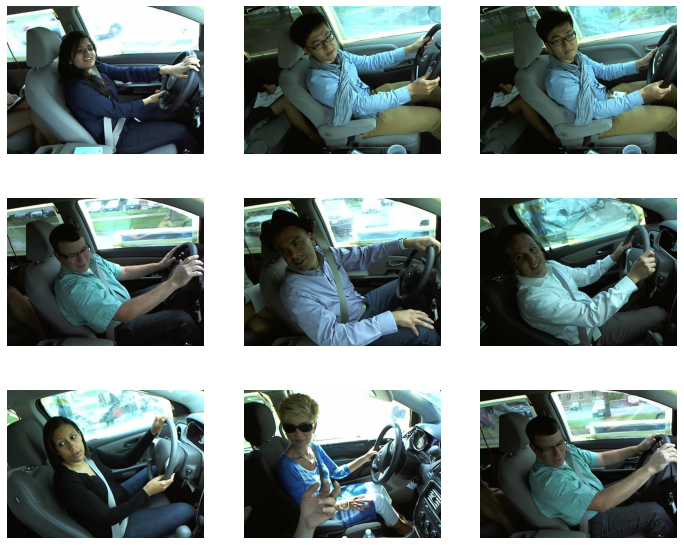

In [9]:
for label in labels:
    f, ax = plt.subplots(figsize=(12, 10))
    files = glob('{}/train/{}/*.jpg'.format(data_dir, label))
    
    print('\t\t\t\t# {} : {}'.format(label, col[label]))
    for x in range(9):
        plt.subplot(3, 3, x+1)
        image = read_image(files[x])
        plt.imshow(image)
        plt.axis('off')
    plt.show()


In [10]:
def create_model():
  model = Sequential()
  #use Batch Normalization for every conv and dense layers
  model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu',input_shape = (160, 120, 1)))
  model.add(BatchNormalization())
  """
  Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer. 
  It may be more appropriate after the activation function if for s-shaped functions like the hyperbolic tangent and logistic function.
  """
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size= (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(128, kernel_size= (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size= (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.33))
  model.add(Dense(32, activation= 'relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
  # model.summary()
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model
  
  

In [11]:
model = create_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 118, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 158, 118, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 158, 118, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 156, 116, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 156, 116, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 78, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 56, 128)       7

In [15]:


model = model
filepath = "weights_best.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
    
n_train = 15702
batch_size = 300
n_valid = 6722
history = model.fit_generator(
           train_generator,
           steps_per_epoch=n_train//batch_size,
           epochs=20,
           validation_data=val_generator,
           validation_steps=n_valid//batch_size,  callbacks=callbacks_list)
    


Epoch 1/20
52/52 [==============================] - 27s 514ms/step - loss: 0.0193 - accuracy: 0.9982 - val_loss: 0.0534 - val_accuracy: 0.9851
Epoch 2/20
52/52 [==============================] - 26s 508ms/step - loss: 0.0161 - accuracy: 0.9976 - val_loss: 0.0169 - val_accuracy: 0.9957
Epoch 3/20
52/52 [==============================] - 26s 506ms/step - loss: 0.0260 - accuracy: 0.9943 - val_loss: 0.3045 - val_accuracy: 0.9716
Epoch 4/20
52/52 [==============================] - 26s 506ms/step - loss: 0.0306 - accuracy: 0.9931 - val_loss: 0.1603 - val_accuracy: 0.9893
Epoch 5/20
52/52 [==============================] - 27s 511ms/step - loss: 0.0257 - accuracy: 0.9949 - val_loss: 0.1522 - val_accuracy: 0.9489
Epoch 6/20
52/52 [==============================] - 26s 506ms/step - loss: 0.0235 - accuracy: 0.9940 - val_loss: 0.0128 - val_accuracy: 0.9979
Epoch 7/20
52/52 [==============================] - 26s 506ms/step - loss: 0.0186 - accuracy: 0.9970 - val_loss: 0.0719 - val_accuracy: 0.9865

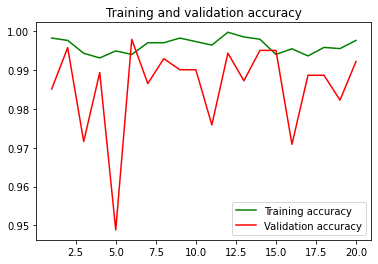

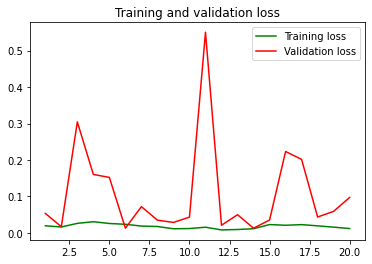

In [19]:
# Plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [22]:
10/2, 10//2, 5/2, 5//2


(5.0, 5, 2.5, 2)